In [1]:
import pandas as pd
import itertools
from scipy import stats
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [2]:
def printmd(string):
    display(Markdown(string))

In [3]:
def get_fld(str):
    try:
        return int(re.findall(r'\d+', str)[1])
    except TypeError:
        print("Field was not a string")

In [4]:
def get_tidy_p1(patient):
    route = "../patient_microscopy_data/{pat}_5_S6P{p}.xls".format(pat = patient, p = '1')
    p1 = pd.read_excel(route, header = 1)
    p1 = p1.rename(mapper={'Unnamed: 0':'Condition', 'Unnamed: 1':'Patient', ' ':'Row', ' .1':'Col'}, axis = 1)
    p1['Section'] = p1['Section'].apply(get_fld)
    p1.drop(axis = 1,labels = ['TMRE POS X','TMRE POS Y', 'TMRE FORM FACTOR', 'MITO POS X','MITO POS Y', 'MITOTRACKER FORM FACTOR',
                   'NUC CG X', 'NUC CG Y', 'NUC FORM FACTOR'])
    return(p1)

In [5]:
def get_tidy_p2(patient):
    route = "../patient_microscopy_data/{pat}_5_S6P{p}.xls".format(pat = patient, p = '2')
    p2 = pd.read_excel(route, header = 1)
    p2 = p2.rename(mapper={'Unnamed: 0':'Condition', 'Unnamed: 1':'Patient', ' ':'Row', ' .1':'Col'}, axis = 1)
    p2['Section'] = p2['Section'].apply(get_fld)
    return(p2)

In [9]:
patients = [get_tidy_p1("FA0440"),get_tidy_p1("FA0883")]

In [10]:
for i in range(len(patients)):
    patients[i]["log_tmre_intensity"] = patients[i]["TMRE INTENSITY"].apply(np.log)
    patients[i]["bc_tmre_intensity"] = stats.boxcox(patients[i]["TMRE INTENSITY"])[0]

**Log TMRE intensity for the whole plate** 


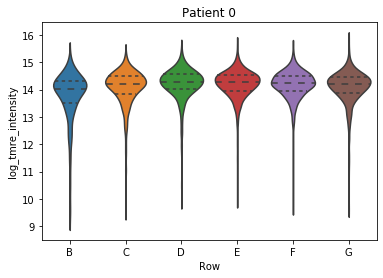

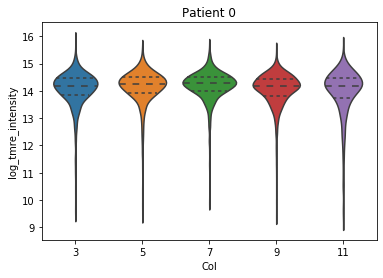

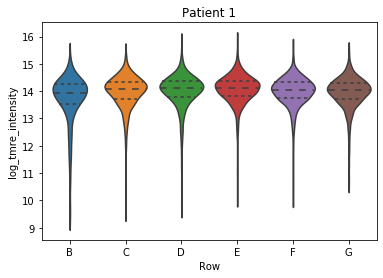

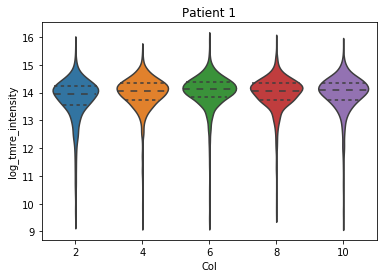

In [11]:
printmd('**Log TMRE intensity for the whole plate** \n')
for i in range(len(patients)):
    plt.figure()
    plt.title("Patient {}".format(i))
    sns.violinplot(x="Row", y="log_tmre_intensity", data=patients[i], inner = "quartiles")
    plt.figure()
    plt.title("Patient {}".format(i))
    sns.violinplot(x="Col", y="log_tmre_intensity", data=patients[i], inner = "quartiles")

**Boxcox TMRE intensity for the whole plate**

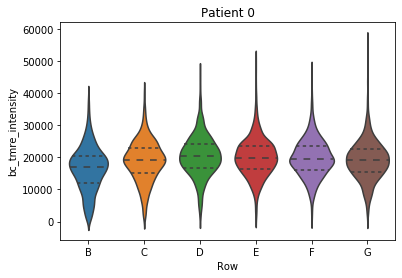

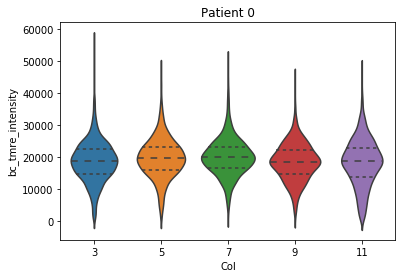

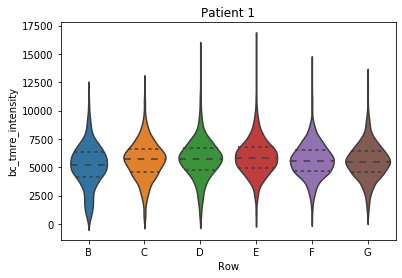

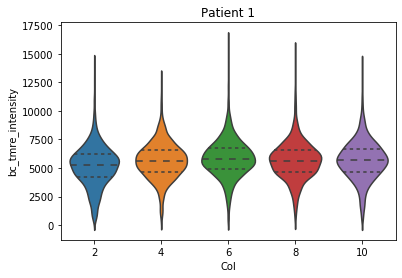

In [12]:
printmd('**Boxcox TMRE intensity for the whole plate**')
for i in range(len(patients)):
    plt.figure()
    plt.title("Patient {}".format(i))
    sns.violinplot(x="Row", y="bc_tmre_intensity", data=patients[i], inner = "quartiles")
    plt.figure()
    plt.title("Patient {}".format(i))
    sns.violinplot(x="Col", y="bc_tmre_intensity", data=patients[i], inner = "quartiles")

In [160]:
pairs = list(itertools.combinations(p1.Row.unique(), 2))

In [14]:
ordered_iterator = []
for row in 'BCDEFG':
    sqn = list(np.arange(2,12))
    if row in 'CEF': sqn.reverse()
    for col in sqn:
        ordered_iterator += [(row,col)]
print(ordered_iterator)

[('B', 2), ('B', 3), ('B', 4), ('B', 5), ('B', 6), ('B', 7), ('B', 8), ('B', 9), ('B', 10), ('B', 11), ('C', 11), ('C', 10), ('C', 9), ('C', 8), ('C', 7), ('C', 6), ('C', 5), ('C', 4), ('C', 3), ('C', 2), ('D', 2), ('D', 3), ('D', 4), ('D', 5), ('D', 6), ('D', 7), ('D', 8), ('D', 9), ('D', 10), ('D', 11), ('E', 11), ('E', 10), ('E', 9), ('E', 8), ('E', 7), ('E', 6), ('E', 5), ('E', 4), ('E', 3), ('E', 2), ('F', 11), ('F', 10), ('F', 9), ('F', 8), ('F', 7), ('F', 6), ('F', 5), ('F', 4), ('F', 3), ('F', 2), ('G', 2), ('G', 3), ('G', 4), ('G', 5), ('G', 6), ('G', 7), ('G', 8), ('G', 9), ('G', 10), ('G', 11)]


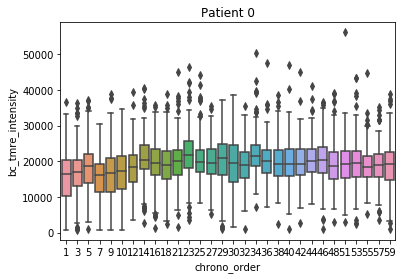

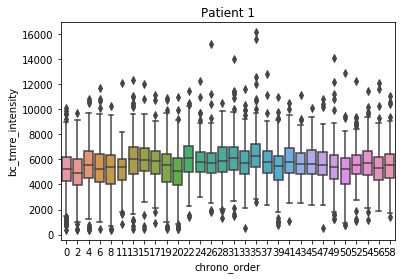

In [129]:
for i in range(len(patients)):
    plt.figure()
    plt.title("Patient {}".format(i))
    patients[i]['chrono_order'] = 0
    j = 0
    for (row,col) in ordered_iterator:
        patients[i].loc[(patients[0]["Row"] == row) & (patients[i]["Col"] == col),'chrono_order'] = j
        j = j + 1
    sns.boxplot(x='chrono_order', y="bc_tmre_intensity", data=patients[i])